## Importing Necessary Libraries

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score


## Loading and Preprocessing the Data

In [105]:

df = pd.read_csv('CarPrice_Assignment.csv')  # Loading dataset

# Checking for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Initial inspection of the data
print(df.head())

# Dropping rows with missing target values if any, which is checked to not be there
df = df.dropna(subset=['price'])

# Data Cleaning
# Convert 'doornumber' and 'cylindernumber' to numeric types
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({
    'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12
})

# Split 'CarName' to extract the brand, which would be essential for training
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0])

# Drop 'car_ID' and 'CarName' columns
df.drop(columns=['car_ID', 'CarName'], inplace=True)

# Performing Label encodes for all categorical variables
label_enc = LabelEncoder()
categorical_features = ['fueltype', 'aspiration', 'enginelocation', 'carbody', 'drivewheel', 'CarBrand', 'enginetype', 'fuelsystem']
for feature in categorical_features:
    df[feature] = label_enc.fit_transform(df[feature])

# Splitting the data into features and target
X = df.drop(columns=['price'])
y = df['price']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for models to evaluate performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.head() #Checking the training data to have just 2 columns reduced

Missing values per column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        s

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarBrand
66,0,0,0,4,3,2,0,104.9,175.0,66.1,...,134,3,3.43,3.64,22.0,72,4200,31,39,11
111,0,1,0,4,3,2,0,107.9,186.7,68.4,...,120,5,3.46,2.19,8.4,95,5000,19,24,15
153,0,1,0,4,4,1,0,95.7,169.7,63.6,...,92,1,3.05,3.03,9.0,62,4800,31,37,22
96,1,1,0,4,3,1,0,94.5,165.3,63.8,...,97,1,3.15,3.29,9.4,69,5200,31,37,14
38,0,1,0,2,2,1,0,96.5,167.5,65.2,...,110,0,3.15,3.58,9.0,86,5800,27,33,7


## Summary statistics and outlier detection

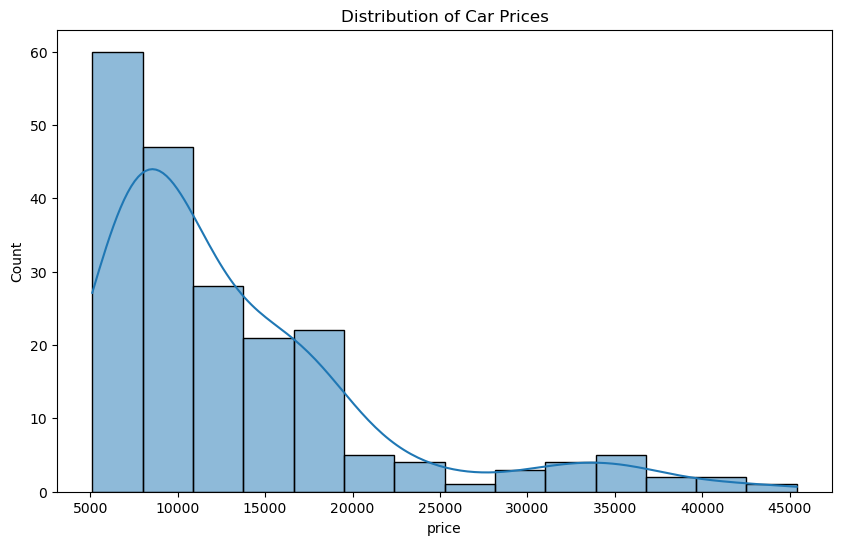

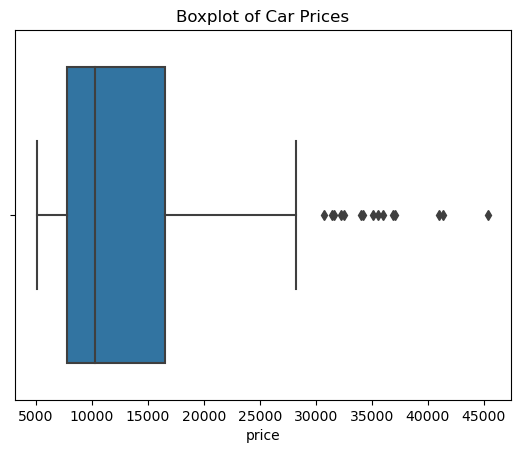

In [107]:
# Visualize the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

# Checking for outliers in the price column
sns.boxplot(x=df['price'])
plt.title('Boxplot of Car Prices')
plt.show()


## Linear Regression

In [109]:
# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on test set
y_pred_linear = linear_reg.predict(X_test)


## Ridge and Lasso Regression

In [111]:
# Train Ridge Regression model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = ridge_reg.predict(X_test)

# Train Lasso Regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Predict on test set
y_pred_lasso = lasso_reg.predict(X_test)


## Random Forest Regressor

In [113]:
# Train Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_reg.predict(X_test)


## Support Vector Regressor (SVR) with hyperparameter tuning

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
# Define SVR model
svr = SVR()

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Set up GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Predict with best model
best_svr = grid_search.best_estimator_
y_pred_svr = best_svr.predict(X_test_scaled)

Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}


## XGBoost

In [117]:
# Train XGBoost model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_reg.predict(X_test)


## Model Comparison

In [119]:
# Cell 11: Model Evaluation
# Define a function to evaluate the models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Convert predictions to binary labels for classification metrics
    y_pred_class = (y_pred > y_test.mean()).astype(int)
    y_test_class = (y_test > y_test.mean()).astype(int)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    precision = precision_score(y_test_class, y_pred_class)
    recall = recall_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)
    
    print(f"{model_name} Results:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)

# Evaluate all models
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
evaluate_model(y_test, y_pred_svr, "Support Vector Regressor")
evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")
evaluate_model(y_test, y_pred_nn, "Neural Network Regressor")


Linear Regression Results:
Mean Squared Error: 12081874.0312
R2 Score: 0.8470
Accuracy: 0.8780
Precision: 0.6875
Recall: 1.0000
F1 Score: 0.8148
------------------------------
Ridge Regression Results:
Mean Squared Error: 11689788.6653
R2 Score: 0.8519
Accuracy: 0.8537
Precision: 0.6471
Recall: 1.0000
F1 Score: 0.7857
------------------------------
Lasso Regression Results:
Mean Squared Error: 12074507.2070
R2 Score: 0.8470
Accuracy: 0.8780
Precision: 0.6875
Recall: 1.0000
F1 Score: 0.8148
------------------------------
Random Forest Regressor Results:
Mean Squared Error: 3448402.0310
R2 Score: 0.9563
Accuracy: 0.9024
Precision: 0.7333
Recall: 1.0000
F1 Score: 0.8462
------------------------------
Support Vector Regressor Results:
Mean Squared Error: 16540710.8674
R2 Score: 0.7905
Accuracy: 0.8780
Precision: 0.6875
Recall: 1.0000
F1 Score: 0.8148
------------------------------
XGBoost Regressor Results:
Mean Squared Error: 5688432.6889
R2 Score: 0.9279
Accuracy: 0.9024
Precision: 0.769

## Create a DataFrame with Actual and Predicted Values


In [121]:
results_df = pd.DataFrame(
    np.hstack([X_test,  # Feature values
               y_test.values.reshape(-1, 1),  # Actual values
               y_pred_linear.reshape(-1, 1),  # Linear Regression Predictions
               y_pred_ridge.reshape(-1, 1),  # Ridge Regression Predictions
               y_pred_lasso.reshape(-1, 1),  # Lasso Regression Predictions
               y_pred_rf.reshape(-1, 1),     # Random Forest Predictions
               y_pred_svr.reshape(-1, 1),    # SVR Predictions
               y_pred_xgb.reshape(-1, 1)]),  # XGBoost Predictions
    columns=[*X.columns,                  # Feature column names
             'Actual',                    # Actual target value
             'Linear_Regression_Predicted',  # Linear Regression Predictions
             'Ridge_Regression_Predicted',    # Ridge Regression Predictions
             'Lasso_Regression_Predicted',    # Lasso Regression Predictions
             'Random_Forest_Predicted',       # Random Forest Predictions
             'SVR_Predicted',                 # SVR Predictions
             'XGBoost_Predicted']             # XGBoost Predictions
)
results_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,citympg,highwaympg,CarBrand,Actual,Linear_Regression_Predicted,Ridge_Regression_Predicted,Lasso_Regression_Predicted,Random_Forest_Predicted,SVR_Predicted,XGBoost_Predicted
0,0.0,1.0,0.0,4.0,3.0,2.0,0.0,103.5,189.0,66.9,...,16.0,22.0,3.0,30760.000,25906.599508,27451.916704,25915.854052,35438.905000,23363.660479,36955.347656
1,0.0,1.0,1.0,2.0,2.0,0.0,0.0,99.5,178.2,67.9,...,16.0,22.0,2.0,17859.167,17368.792450,17528.456376,17376.072803,19460.790000,16744.031224,19875.384766
2,0.0,1.0,0.0,4.0,3.0,1.0,0.0,97.2,173.4,65.2,...,27.0,34.0,14.0,9549.000,9872.385217,10491.954872,9877.752773,8989.850000,9792.672273,8446.577148
3,3.0,1.0,0.0,2.0,2.0,1.0,0.0,99.1,186.6,66.5,...,21.0,28.0,20.0,11850.000,13320.528876,13694.122166,13322.303132,12832.235000,13807.335540,12161.556641
4,-1.0,0.0,1.0,4.0,4.0,2.0,0.0,110.0,190.9,70.3,...,22.0,25.0,4.0,28248.000,26305.554663,25756.860156,26298.444775,27651.000000,22858.719224,32218.906250
5,1.0,1.0,0.0,2.0,2.0,1.0,0.0,94.5,165.6,63.8,...,31.0,37.0,14.0,7799.000,6133.263005,6081.566778,6132.941708,6546.180000,6640.771314,6701.740234
6,0.0,0.0,0.0,4.0,2.0,1.0,0.0,95.7,166.3,64.4,...,38.0,47.0,22.0,7788.000,8420.370768,9342.728137,8428.487467,7901.440000,7777.127828,7922.675293
7,0.0,1.0,0.0,4.0,3.0,1.0,0.0,95.7,166.3,64.4,...,28.0,34.0,22.0,9258.000,5942.154767,5824.112606,5942.424368,8074.010000,7035.617266,7931.209961
8,0.0,1.0,0.0,4.0,4.0,1.0,0.0,97.0,173.5,65.4,...,25.0,31.0,21.0,10198.000,9567.597122,9700.554568,9570.337229,9665.180000,11556.415986,9242.157227
9,2.0,0.0,0.0,2.0,3.0,1.0,0.0,97.3,171.7,65.5,...,37.0,46.0,24.0,7775.000,6884.537198,7272.420833,6888.729976,8145.845000,7347.647023,7856.481445


## Save the DataFrame to a CSV file

In [123]:
results_df.to_csv('CarPrice_PREDICTED.csv', index=False)

print("DataFrame with actual, predicted values, and features saved as 'CarPrice_PREDICTED.csv'.")

DataFrame with actual, predicted values, and features saved as 'CarPrice_PREDICTED.csv'.


## To check feature importances

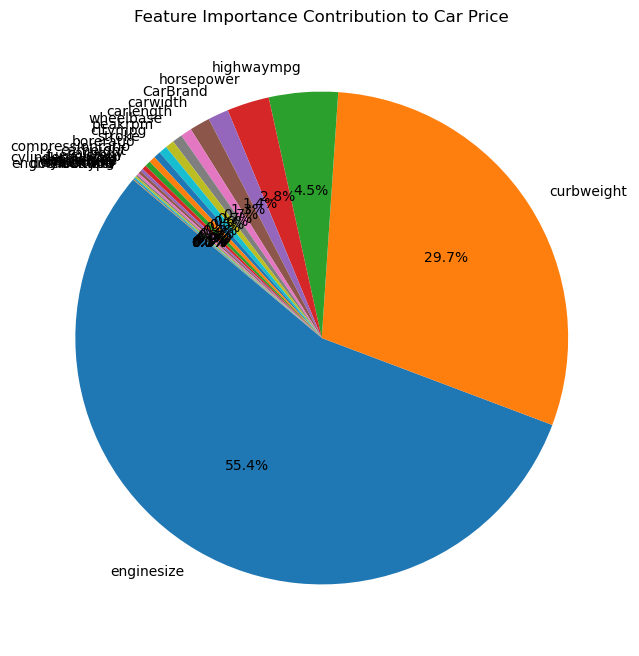

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = rf_reg.feature_importances_

# Normalize the feature importances
feature_importances_normalized = feature_importances / np.sum(feature_importances)

# Create a DataFrame to associate feature names with their importance
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_normalized
}).sort_values(by='Importance', ascending=False)

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(importances_df['Importance'], labels=importances_df['Feature'], autopct='%1.1f%%', startangle=140)
plt.title('Feature Importance Contribution to Car Price')
plt.show()
